In [5]:
#import standard modules
#modify pandas display settings
#import regression and validation modules
#import visualization tool

import pandas as pd
import numpy as np
%matplotlib inline 
import matplotlib.pyplot as plt
from sklearn import preprocessing as prep

pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [6]:
#load csv dataset into dataframe

df = pd.read_csv('censusincome.csv')

In [7]:
#display row and column count respectively
#represent number of records and attributes

df.shape

(32561, 15)

In [8]:
#display sample of the dataset

df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [9]:
#Change column names to make sure they can be used in python

df.columns = ['age', 'workclass', 'fnlwgt', 'education','education_num', 'marital_status','occupation','relationship','race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']


In [10]:
#Evaluate extraneous columns

#final weight(fnlwgt) is a column from a previous data analysis and serves no purpose
#relationship represents familial status
#information is already reflected by other columns such as marital-status or sex

In [11]:
#Remove extraneous columns

df.drop(['fnlwgt', 'relationship'], axis=1, inplace=True)

In [12]:
#Check for missing values

df.isnull().sum()

age               0
workclass         0
education         0
education_num     0
marital_status    0
occupation        0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [13]:
#Use describe to generate descriptive statistics
#take particular note of the distribution of age and education
#infrequency of capital gain/loss columns represented by 0 quartiles
#hours per week shows vast majority work around 40 hrs/wk

df.describe()

,age,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,10.080679,1077.648844,87.303830,40.437456
std,13.640433,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [14]:
#Find the interquartile range to help determine outliers
#https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba
#quartile data is also reflected in df.describe()
#shows that only age has a significant spread within the middle values

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

IQR = Q3 - Q1
print(IQR)

age               20.0
education_num      3.0
capital_gain       0.0
capital_loss       0.0
hours_per_week     5.0
dtype: float64


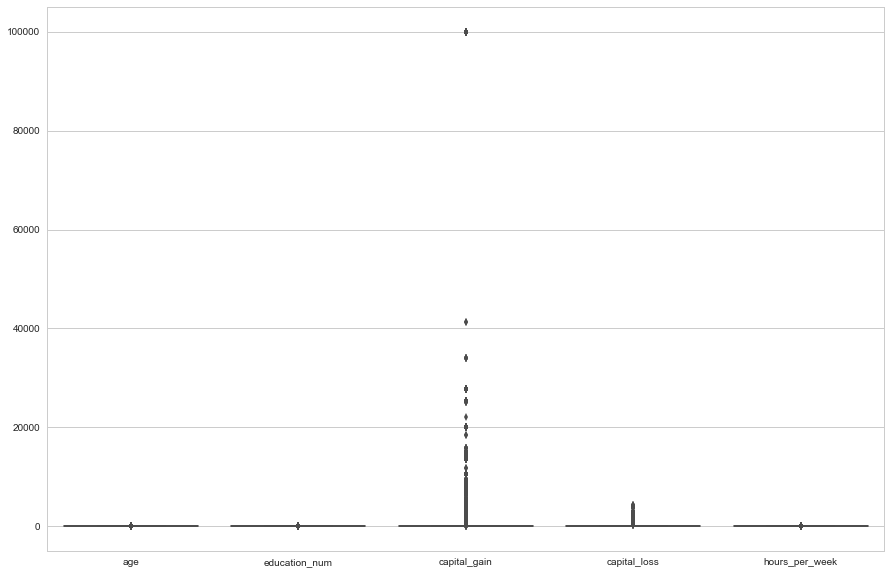

In [15]:
#increase graph size to better view data
plt.rcParams['figure.figsize'] = [15, 10]

#generate box and whisker plot to visualize outliers
ax = sns.boxplot(data=df)

#capital_gain represents a small portion of the data while also displaying high variance
#wide distribution in values results in extremely zoomed out view
#outliers don't obviously show incorrectly inputted data
#outliers are relevant to results and assumptions
#decision - not to drop
#https://www.theanalysisfactor.com/outliers-to-drop-or-not-to-drop/

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E6EA5AD780>,
      dtype=object)

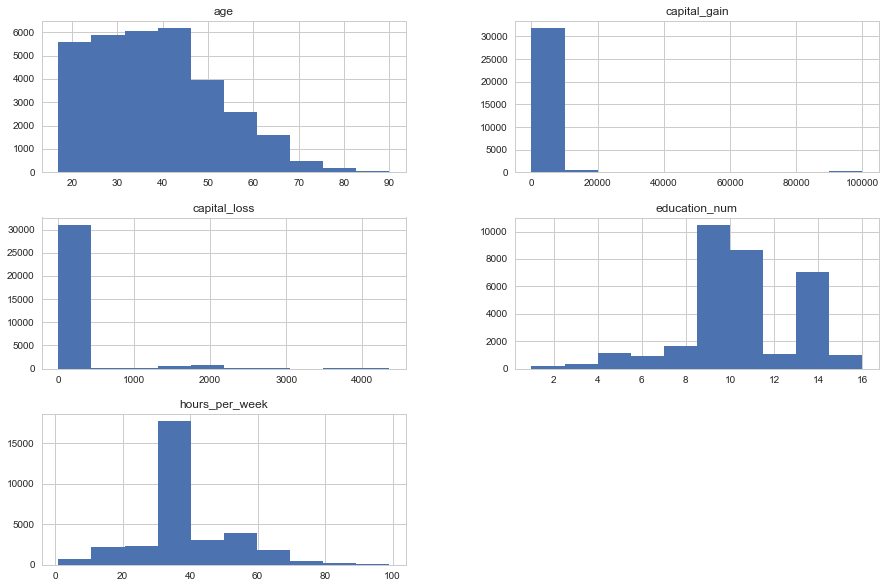

In [16]:
#display numerical data columns as histograms
#visualizes previous conclusions

df.hist()

In [17]:
#Discretize age into buckets for management and calculation

df["Age_buckets"] = pd.cut(df.age, [0,20,40,60,90], labels=["Age_0_20", "Age_20_40", "Age_40_60", "Age_60_90"], include_lowest=True) 


In [18]:
df["Age_buckets"].value_counts()

Age_20_40    16708
Age_40_60    11111
Age_0_20      2410
Age_60_90     2332
Name: Age_buckets, dtype: int64

In [19]:
#Workclass categories

df["workclass"].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [20]:
#Consolidate workclass categories to: 
#Private
#Government
#Self_Employed
#Unemployed
#Unknown

In [21]:
df['workclass'] = df['workclass'].str.replace('?', 'Unknown')
df['workclass'] = df['workclass'].str.replace('State-gov','Government')
df['workclass'] = df['workclass'].str.replace('Federal-gov','Government')
df['workclass'] = df['workclass'].str.replace('Local-gov', 'Government')
df['workclass'] = df['workclass'].str.replace('Self-emp-not-inc', 'Self_Employed')
df['workclass'] = df['workclass'].str.replace('Self-emp-inc', 'Self_Employed')
df['workclass'] = df['workclass'].str.replace('Without-pay', 'Unemployed')
df['workclass'] = df['workclass'].str.replace('Never-worked', 'Unemployed')



In [22]:
df["workclass"].value_counts()

 Private          22696
 Government        4351
 Self_Employed     3657
 Unknown           1836
 Unemployed          21
Name: workclass, dtype: int64

In [23]:
#Education levels

df.groupby(['education']).size()

education
 10th              933
 11th             1175
 12th              433
 1st-4th           168
 5th-6th           333
 7th-8th           646
 9th               514
 Assoc-acdm       1067
 Assoc-voc        1382
 Bachelors        5355
 Doctorate         413
 HS-grad         10501
 Masters          1723
 Preschool          51
 Prof-school       576
 Some-college     7291
dtype: int64

In [24]:
#Consolidate education levels to:
#Gradeschool
#Highschool
#College
#Advanced

In [25]:
df['education'] = df['education'].str.replace('Preschool', 'Gradeschool')
df['education'] = df['education'].str.replace('1st-4th', 'Gradeschool')
df['education'] = df['education'].str.replace('5th-6th', 'Gradeschool')
df['education'] = df['education'].str.replace('7th-8th', 'Gradeschool')
df['education'] = df['education'].str.replace('9th', 'Highschool')
df['education'] = df['education'].str.replace('10th', 'Highschool')
df['education'] = df['education'].str.replace('11th', 'Highschool')
df['education'] = df['education'].str.replace('12th', 'Highschool')
df['education'] = df['education'].str.replace('HS-grad', 'Highschool')
df['education'] = df['education'].str.replace('Assoc-acdm', 'College')
df['education'] = df['education'].str.replace('Assoc-voc', 'College')
df['education'] = df['education'].str.replace('Bachelors', 'College')
df['education'] = df['education'].str.replace('Some-college', 'College')
df['education'] = df['education'].str.replace('Masters', 'Advanced')
df['education'] = df['education'].str.replace('Prof-school', 'Advanced')
df['education'] = df['education'].str.replace('Doctorate', 'Advanced')


In [26]:
df["education"].value_counts()

 College        15095
 Highschool     13556
 Advanced        2712
 Gradeschool     1198
Name: education, dtype: int64

In [27]:
#Marriage statuses

df.groupby(['marital_status']).size()

marital_status
 Divorced                  4443
 Married-AF-spouse           23
 Married-civ-spouse       14976
 Married-spouse-absent      418
 Never-married            10683
 Separated                 1025
 Widowed                    993
dtype: int64

In [28]:
#Consolidate marriage status to:
#Married
#Previously Married
#Never Married

In [29]:
df['marital_status'] = df['marital_status'].str.replace('Divorced', 'Previously_Married')
df['marital_status'] = df['marital_status'].str.replace('Widowed', 'Previously_Married')
df['marital_status'] = df['marital_status'].str.replace('Married-AF-spouse', 'Married')
df['marital_status'] = df['marital_status'].str.replace('Married-civ-spouse', 'Married')
df['marital_status'] = df['marital_status'].str.replace('Married-spouse-absent', 'Married')
df['marital_status'] = df['marital_status'].str.replace('Separated', 'Previously_Married')


In [30]:
df.groupby(['marital_status']).size()

marital_status
 Married               15417
 Never-married         10683
 Previously_Married     6461
dtype: int64

In [31]:
#Occupation categories
#kept diverse not to overreduce

df.groupby(['occupation']).size()

occupation
 ?                    1843
 Adm-clerical         3770
 Armed-Forces            9
 Craft-repair         4099
 Exec-managerial      4066
 Farming-fishing       994
 Handlers-cleaners    1370
 Machine-op-inspct    2002
 Other-service        3295
 Priv-house-serv       149
 Prof-specialty       4140
 Protective-serv       649
 Sales                3650
 Tech-support          928
 Transport-moving     1597
dtype: int64

In [32]:
#Changing ? to unknown for consistency with other columns

df['occupation'] = df['occupation'].str.replace('?', 'Unknown')

In [33]:
#Race categories
#no need to discretize
#Hispanic grouped with White according to original data
#Will be noted in final discussion

df.groupby(['race']).size()

race
 Amer-Indian-Eskimo      311
 Asian-Pac-Islander     1039
 Black                  3124
 Other                   271
 White                 27816
dtype: int64

In [34]:
#Sex categories
#no need to discretize

df.groupby(['sex']).size()

sex
 Female    10771
 Male      21790
dtype: int64

In [35]:
#Native country locations

df.groupby(['native_country']).size()

native_country
 ?                               583
 Cambodia                         19
 Canada                          121
 China                            75
 Columbia                         59
 Cuba                             95
 Dominican-Republic               70
 Ecuador                          28
 El-Salvador                     106
 England                          90
 France                           29
 Germany                         137
 Greece                           29
 Guatemala                        64
 Haiti                            44
 Holand-Netherlands                1
 Honduras                         13
 Hong                             20
 Hungary                          13
 India                           100
 Iran                             43
 Ireland                          24
 Italy                            73
 Jamaica                          81
 Japan                            62
 Laos                             18
 Mexico                

In [36]:
#Consolidate native country locations to:

#United-States
#Canada
#Mexico
#Caribbean (Cuba, Dominican-Republic, Haiti, Jamaica, Puerto-Rico, Trinidad&Tobago)
#Central-America (El-Salvador, Guatemala, Honduras, Nicaragua)
#South-America (Columbia, Ecuador, Peru)
#Southeast-Asia (Cambodia, Laos, Philippines, Thailand, Vietnam)
#East-Asia (China, Japan, Taiwan)
#South-Asia (India)
#Western-Asia (Iran)
#United-Kingdom (England, Ireland, Scotland)
#Western-Europe (France, Germany, Holand-Netherlands, Italy, Portugal)
#Central-Europe (Greece, Hungary, Poland, Yugoslavia)
#Unknown (?, South, Hong)

#US, Canada, Mexico, and Territories kept separate to represent regional differences

In [37]:
df['native_country'] = df['native_country'].str.replace('?', 'Unknown')
df['native_country'] = df['native_country'].str.replace('South', 'Unknown')
df['native_country'] = df['native_country'].str.replace('Hong', 'Unknown')
df['native_country'] = df['native_country'].str.replace('Cuba', 'Caribbean')
df['native_country'] = df['native_country'].str.replace('Dominican-Republic', 'Caribbean')
df['native_country'] = df['native_country'].str.replace('Haiti', 'Caribbean')
df['native_country'] = df['native_country'].str.replace('Jamaica', 'Caribbean')
df['native_country'] = df['native_country'].str.replace('Puerto-Rico', 'Caribbean')
df['native_country'] = df['native_country'].str.replace('Trinadad&Tobago', 'Caribbean')
df['native_country'] = df['native_country'].str.replace('El-Salvador', 'Central-America')
df['native_country'] = df['native_country'].str.replace('Guatemala', 'Central-America')
df['native_country'] = df['native_country'].str.replace('Honduras', 'Central-America')
df['native_country'] = df['native_country'].str.replace('Nicaragua', 'Central-America')
df['native_country'] = df['native_country'].str.replace('Columbia', 'South-America')
df['native_country'] = df['native_country'].str.replace('Ecuador', 'South-America')
df['native_country'] = df['native_country'].str.replace('Peru', 'South-America')
df['native_country'] = df['native_country'].str.replace('Cambodia', 'Southeast-Asia')
df['native_country'] = df['native_country'].str.replace('Laos', 'Southeast-Asia')
df['native_country'] = df['native_country'].str.replace('Philippines', 'Southeast-Asia')
df['native_country'] = df['native_country'].str.replace('Thailand', 'Southeast-Asia')
df['native_country'] = df['native_country'].str.replace('Vietnam', 'Southeast-Asia')
df['native_country'] = df['native_country'].str.replace('China', 'East-Asia')
df['native_country'] = df['native_country'].str.replace('Japan', 'East-Asia')
df['native_country'] = df['native_country'].str.replace('Taiwan', 'East-Asia')
df['native_country'] = df['native_country'].str.replace('India', 'South-Asia')
df['native_country'] = df['native_country'].str.replace('Iran', 'Western-Asia')
df['native_country'] = df['native_country'].str.replace('England', 'United-Kingdom')
df['native_country'] = df['native_country'].str.replace('Ireland', 'United-Kingdom')
df['native_country'] = df['native_country'].str.replace('Scotland', 'United-Kingdom')
df['native_country'] = df['native_country'].str.replace('France', 'Western-Europe')
df['native_country'] = df['native_country'].str.replace('Germany', 'Western-Europe')
df['native_country'] = df['native_country'].str.replace('Holand-Netherlands', 'Western-Europe')
df['native_country'] = df['native_country'].str.replace('Italy', 'Western-Europe')
df['native_country'] = df['native_country'].str.replace('Portugal', 'Western-Europe')
df['native_country'] = df['native_country'].str.replace('Greece', 'Central-Europe')
df['native_country'] = df['native_country'].str.replace('Hungary', 'Central-Europe')
df['native_country'] = df['native_country'].str.replace('Poland', 'Central-Europe')
df['native_country'] = df['native_country'].str.replace('Yugoslavia', 'Central-Europe')

In [38]:
#income categories
#no need to discretize
#target output variable
#shows imbalance in data
#will be compensated for later using oversampling

df.groupby(['income']).size()

income
 <=50K    24720
 >50K      7841
dtype: int64

In [39]:
#with column options reduced, minimum number of dummy columns can be generated
#convert columns that contain discrete data to dummies

df_dummy = pd.get_dummies(df)
df_dummy.head()

,age,education_num,capital_gain,capital_loss,hours_per_week,workclass_ Government,workclass_ Private,workclass_ Self_Employed,workclass_ Unemployed,workclass_ Unknown,education_ Advanced,education_ College,education_ Gradeschool,education_ Highschool,marital_status_ Married,marital_status_ Never-married,marital_status_ Previously_Married,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,occupation_ Unknown,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,native_country_ Canada,native_country_ Caribbean,native_country_ Central-America,native_country_ Central-Europe,native_country_ East-Asia,native_country_ Mexico,native_country_ Outlying-US(Guam-USVI-etc),native_country_ South-America,native_country_ South-Asia,native_country_ Southeast-Asia,native_country_ United-Kingdom,native_country_ United-States,native_country_ Unknown,native_country_ Western-Asia,native_country_ Western-Europe,income_ <=50K,income_ >50K,Age_buckets_Age_0_20,Age_buckets_Age_20_40,Age_buckets_Age_40_60,Age_buckets_Age_60_90
0,39,13,2174,0,40,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0
1,50,13,0,0,13,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
2,38,9,0,0,40,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0
3,53,7,0,0,40,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
4,28,13,0,0,40,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


In [40]:
#Subtract dataframe from dummy frame to get only dummy variables
#merge the dummy variable columns onto the dataframe
cols_to_use = df_dummy.columns.difference(df.columns)

df = pd.merge(df, df_dummy[cols_to_use], left_index=True, right_index=True, how='outer')
df.head()

,age,workclass,education,education_num,marital_status,occupation,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,Age_buckets,Age_buckets_Age_0_20,Age_buckets_Age_20_40,Age_buckets_Age_40_60,Age_buckets_Age_60_90,education_ Advanced,education_ College,education_ Gradeschool,education_ Highschool,income_ <=50K,income_ >50K,marital_status_ Married,marital_status_ Never-married,marital_status_ Previously_Married,native_country_ Canada,native_country_ Caribbean,native_country_ Central-America,native_country_ Central-Europe,native_country_ East-Asia,native_country_ Mexico,native_country_ Outlying-US(Guam-USVI-etc),native_country_ South-America,native_country_ South-Asia,native_country_ Southeast-Asia,native_country_ United-Kingdom,native_country_ United-States,native_country_ Unknown,native_country_ Western-Asia,native_country_ Western-Europe,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,occupation_ Unknown,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,workclass_ Government,workclass_ Private,workclass_ Self_Employed,workclass_ Unemployed,workclass_ Unknown
0,39,Government,College,13,Never-married,Adm-clerical,White,Male,2174,0,40,United-States,<=50K,Age_20_40,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0
1,50,Self_Employed,College,13,Married,Exec-managerial,White,Male,0,0,13,United-States,<=50K,Age_40_60,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0
2,38,Private,Highschool,9,Previously_Married,Handlers-cleaners,White,Male,0,0,40,United-States,<=50K,Age_20_40,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0
3,53,Private,Highschool,7,Married,Handlers-cleaners,Black,Male,0,0,40,United-States,<=50K,Age_40_60,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0
4,28,Private,College,13,Married,Prof-specialty,Black,Female,0,0,40,Caribbean,<=50K,Age_20_40,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0


In [41]:
#center and Scale data
scaled = prep.scale(df_dummy)
 
#remake dataframe after scaling process 
df_scaled = pd.DataFrame(scaled, index=df_dummy.index,
                           columns=df_dummy.columns)

df_scaled.head()

C:\Users\hanth\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by the scale function.
  


,age,education_num,capital_gain,capital_loss,hours_per_week,workclass_ Government,workclass_ Private,workclass_ Self_Employed,workclass_ Unemployed,workclass_ Unknown,education_ Advanced,education_ College,education_ Gradeschool,education_ Highschool,marital_status_ Married,marital_status_ Never-married,marital_status_ Previously_Married,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,occupation_ Unknown,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,native_country_ Canada,native_country_ Caribbean,native_country_ Central-America,native_country_ Central-Europe,native_country_ East-Asia,native_country_ Mexico,native_country_ Outlying-US(Guam-USVI-etc),native_country_ South-America,native_country_ South-Asia,native_country_ Southeast-Asia,native_country_ United-Kingdom,native_country_ United-States,native_country_ Unknown,native_country_ Western-Asia,native_country_ Western-Europe,income_ <=50K,income_ >50K,Age_buckets_Age_0_20,Age_buckets_Age_20_40,Age_buckets_Age_40_60,Age_buckets_Age_60_90
0,0.030671,1.134739,0.148453,-0.21666,-0.035429,2.546285,-1.516792,-0.35570,-0.025404,-0.24445,-0.301425,1.075673,-0.195443,-0.844563,-0.948296,1.431058,-0.497542,2.763489,-0.016628,-0.379495,-0.377746,-0.17745,-0.209578,-0.255954,-0.335541,-0.067802,-0.381663,-0.142608,-0.355316,-0.171279,-0.227104,-0.244944,-0.098201,-0.181552,-0.325768,-0.091612,0.413020,-0.703071,0.703071,-0.061073,-0.114726,-0.081909,-0.060309,-0.076206,-0.141934,-0.02074,-0.060309,-0.055503,-0.099626,-0.062327,0.340954,-0.146374,-0.036364,-0.092629,0.563199,-0.563199,-0.282721,0.974077,-0.719719,-0.277749
1,0.837109,1.134739,-0.145920,-0.21666,-2.222153,-0.392729,-1.516792,2.81136,-0.025404,-0.24445,-0.301425,1.075673,-0.195443,-0.844563,1.054523,-0.698784,-0.497542,-0.361861,-0.016628,-0.379495,2.647285,-0.17745,-0.209578,-0.255954,-0.335541,-0.067802,-0.381663,-0.142608,-0.355316,-0.171279,-0.227104,-0.244944,-0.098201,-0.181552,-0.325768,-0.091612,0.413020,-0.703071,0.703071,-0.061073,-0.114726,-0.081909,-0.060309,-0.076206,-0.141934,-0.02074,-0.060309,-0.055503,-0.099626,-0.062327,0.340954,-0.146374,-0.036364,-0.092629,0.563199,-0.563199,-0.282721,-1.026612,1.389431,-0.277749
2,-0.042642,-0.420060,-0.145920,-0.21666,-0.035429,-0.392729,0.659286,-0.35570,-0.025404,-0.24445,-0.301425,-0.929651,-0.195443,1.184045,-0.948296,-0.698784,2.009881,-0.361861,-0.016628,-0.379495,-0.377746,-0.17745,4.771494,-0.255954,-0.335541,-0.067802,-0.381663,-0.142608,-0.355316,-0.171279,-0.227104,-0.244944,-0.098201,-0.181552,-0.325768,-0.091612,0.413020,-0.703071,0.703071,-0.061073,-0.114726,-0.081909,-0.060309,-0.076206,-0.141934,-0.02074,-0.060309,-0.055503,-0.099626,-0.062327,0.340954,-0.146374,-0.036364,-0.092629,0.563199,-0.563199,-0.282721,0.974077,-0.719719,-0.277749
3,1.057047,-1.197459,-0.145920,-0.21666,-0.035429,-0.392729,0.659286,-0.35570,-0.025404,-0.24445,-0.301425,-0.929651,-0.195443,1.184045,1.054523,-0.698784,-0.497542,-0.361861,-0.016628,-0.379495,-0.377746,-0.17745,4.771494,-0.255954,-0.335541,-0.067802,-0.381663,-0.142608,-0.355316,-0.171279,-0.227104,-0.244944,-0.098201,-0.181552,3.069667,-0.091612,-2.421192,-0.703071,0.703071,-0.061073,-0.114726,-0.081909,-0.060309,-0.076206,-0.141934,-0.02074,-0.060309,-0.055503,-0.099626,-0.062327,0.340954,-0.146374,-0.036364,-0.092629,0.563199,-0.563199,-0.282721,-1.026612,1.389431,-0.277749
4,-0.775768,1.134739,-0.145920,-0.21666,-0.035429,-0.392729,0.659286,-0.35570,-0.025404,-0.24445,-0.301425,1.075673,-0.195443,-0.844563,1.054523,-0.698784,-0.497542,-0.361861,-0.016628,-0.379495,-0.377746,-0.17745,-0.209578,-0.255954,-0.335541,-0.067802,2.620110,

In [42]:
#Display correlations between variables

df.corr()

,age,education_num,capital_gain,capital_loss,hours_per_week,Age_buckets_Age_0_20,Age_buckets_Age_20_40,Age_buckets_Age_40_60,Age_buckets_Age_60_90,education_ Advanced,education_ College,education_ Gradeschool,education_ Highschool,income_ <=50K,income_ >50K,marital_status_ Married,marital_status_ Never-married,marital_status_ Previously_Married,native_country_ Canada,native_country_ Caribbean,native_country_ Central-America,native_country_ Central-Europe,native_country_ East-Asia,native_country_ Mexico,native_country_ Outlying-US(Guam-USVI-etc),native_country_ South-America,native_country_ South-Asia,native_country_ Southeast-Asia,native_country_ United-Kingdom,native_country_ United-States,native_country_ Unknown,native_country_ Western-Asia,native_country_ Western-Europe,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,occupation_ Unknown,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,workclass_ Government,workclass_ Private,workclass_ Self_Employed,workclass_ Unemployed,workclass_ Unknown
age,1.000000,0.036527,0.077674,0.057775,0.068756,-0.410917,-0.598754,0.540710,0.583602,0.136400,-0.091150,0.111101,-0.026678,-0.234037,0.234037,0.318239,-0.534359,0.230673,0.017748,0.012705,-0.030335,0.023882,0.000970,-0.055054,0.000202,-0.003396,-0.002001,-0.006439,0.007351,0.015917,-0.000020,0.002231,0.017967,-0.042902,-0.010190,0.012515,0.099352,0.034210,-0.098579,-0.016257,-0.089346,0.015624,0.054170,0.003891,-0.031980,-0.019576,0.026909,0.041323,-0.010137,-0.011111,-0.019434,-0.034415,0.033412,-0.088832,0.088832,0.076703,-0.198388,0.174917,0.000247,0.042627
education_num,0.036527,1.000000,0.122630,0.079923,0.148123,-0.167368,0.057464,0.067341,-0.065283,0.519772,0.439590,-0.514066,-0.539734,-0.335154,0.335154,0.078258,-0.032109,-0.060173,0.013584,-0.059156,-0.097936,-0.000501,0.051338,-0.217666,0.001653,-0.016195,0.050685,0.011034,0.016504,0.101207,0.031563,0.032717,-0.003685,0.004620,0.000197,-0.143073,0.200923,-0.101533,-0.127934,-0.158503,-0.169684,-0.071638,0.419006,0.005777,0.030253,0.060703,-0.115960,-0.078766,-0.029345,0.062091,-0.075272,-0.044133,0.051353,-0.012280,0.012280,0.159669,-0.118484,0.058561,-0.015373,-0.077946
capital_gain,0.077674,0.122630,1.000000,-0.031615,0.078409,-0.037643,-0.051010,0.061009,0.024917,0.142393,-0.006876,-0.022407,-0.064304,-0.223329,0.223329,0.084119,-0.066334,-0.027218,0.003527,-0.008924,-0.007738,-0.002353,0.005063,-0.014042,-0.003026,-0.006914,0.018994,-0.003227,-0.003014,0.004599,0.013544,0.004761,-0.004891,-0.028502,-0.002426,-0.022000,0.060618,-0.011724,-0.023272,-0.025957,-0.040271,-0.007324,0.085222,-0.007136,0.011652,-0.009372,-0.018061,-0.015693,-0.006015,0.009851,-0.020631,-0.001774,0.014429,-0.048480,0.048480,-0.013883,-0.038701,0.082878,-0.002588,-0.015585
capital_loss,0.057775,0.079923,-0.031615,1.000000,0.054256,-0.032951,-0.035692,0.049689,0.011275,0.080601,0.005876,-0.011308,-0.046806,-0.150526,0.150526,0.078130,-0.060623,-0.026445,0.006461,-0.009939,-0.008172,0.002518,0.008564,-0.022035,-0.004494,-0.008691,0.006035,0.000759,-0.002044,0.008784,0.013217,0.003566,-0.007733,-0.023806,0.005049,0.001094,0.048311,-0.010670,-0.021672,-0.016259,-0.040847,-0.011081,0.046255,-0.003174,0.009697,0.004830,-0.003282,-0.016275,-0.012947,0.004469,-0.021762,-0.005964,0.021044,-0.045567,0.045567,0.014764,-0.027460,0.036262,-0.005504,-0.016102
hours_per_week,0.068756,0.148123,0.078409,0.054256,1.000000,-0.271846,0.085374,0.149617,-0.164594,0.113246,0.008931,-0.023308,-0.063613,-0.229689,0.229689,0.210912,-0.197936,-0.031024,-0.000161,-0.012192,-0.020236,-0.000522,-0.002503,-0.001113,0.002385,-0.010829,0.004911,-0.006984,0

In [43]:
#alternate correlation view

c = df.corr().abs()
s = c.unstack()
so = s.sort_values(kind="quicksort", ascending=False)
so

workclass_ Unknown                          workclass_ Unknown                            1.000000
occupation_ Protective-serv                 occupation_ Protective-serv                   1.000000
native_country_ Unknown                     native_country_ Unknown                       1.000000
native_country_ Western-Asia                native_country_ Western-Asia                  1.000000
native_country_ Western-Europe              native_country_ Western-Europe                1.000000
occupation_ Adm-clerical                    occupation_ Adm-clerical                      1.000000
occupation_ Armed-Forces                    occupation_ Armed-Forces                      1.000000
occupation_ Craft-repair                    occupation_ Craft-repair                      1.000000
occupation_ Exec-managerial                 occupation_ Exec-managerial                   1.000000
occupation_ Farming-fishing                 occupation_ Farming-fishing                   1.000000
occupation

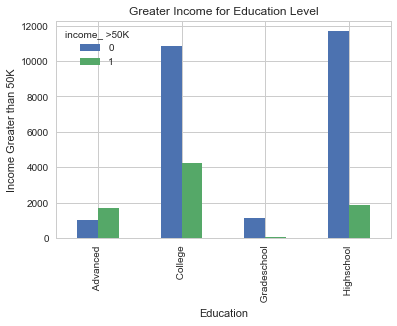

In [44]:
#Eplore trends of intrinsic and extrinsic attributes
#using Seaborn visualization module


%matplotlib inline
pd.crosstab(df['education'], df['income_ >50K']).plot(kind='bar')
plt.title('Greater Income for Education Level')
plt.xlabel('Education')
plt.ylabel('Income Greater than 50K')
plt.savefig('Income_Education')

In [45]:
#Education seems to be a good predictor
#Advanced degrees showing greatest success

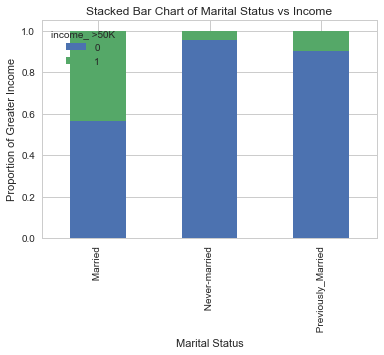

In [46]:
table=pd.crosstab(df['marital_status'], df['income_ >50K'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Income')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Greater Income')
plt.savefig('marital_vs_greater_income')

In [47]:
#Marital status seems to be a good predictor
#greater income shows dependance on status

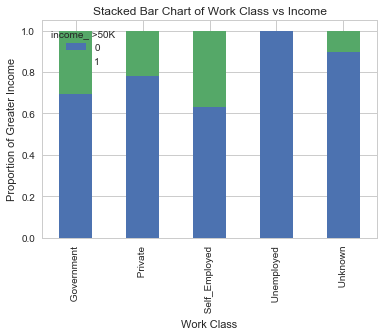

In [48]:
table=pd.crosstab(df['workclass'], df['income_ >50K'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Work Class vs Income')
plt.xlabel('Work Class')
plt.ylabel('Proportion of Greater Income')
plt.savefig('workclass_vs_greater_income')

In [49]:
#Work class seems to be a good predictor
#greater income shows dependance on class
#unemployed showing no chance of greater income

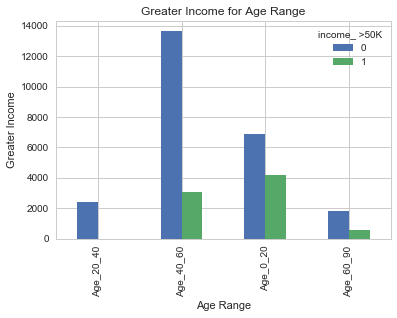

In [50]:
pd.crosstab(df['Age_buckets'], df['income_ >50K']).plot(kind='bar')
plt.title('Greater Income for Age Range')
plt.xlabel('Age Range')
plt.ylabel('Greater Income')
plt.savefig('age_vs_greater_income_bar')

In [51]:
#age seems to be a good predictor
#20-40 results unexpected

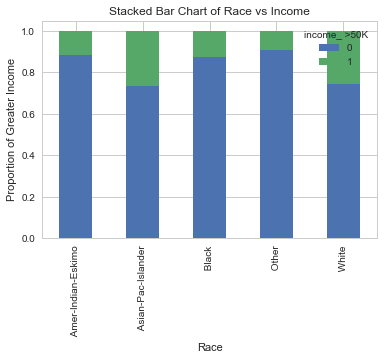

In [52]:
table=pd.crosstab(df['race'], df['income_ >50K'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Race vs Income')
plt.xlabel('Race')
plt.ylabel('Proportion of Greater Income')
plt.savefig('race_vs_greater_income')

In [53]:
#race seems to be a good predictor
#greater income shows dependance on race

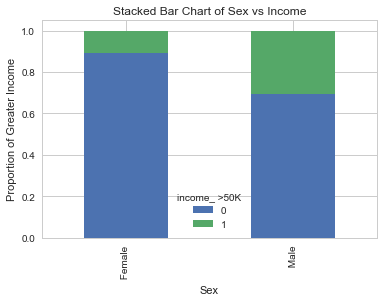

In [54]:
table=pd.crosstab(df['sex'], df['income_ >50K'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Sex vs Income')
plt.xlabel('Sex')
plt.ylabel('Proportion of Greater Income')
plt.savefig('sex_vs_greater_income')

In [55]:
#sex seems to be a good predictor
#greater income shows dependance on sex
#striking results

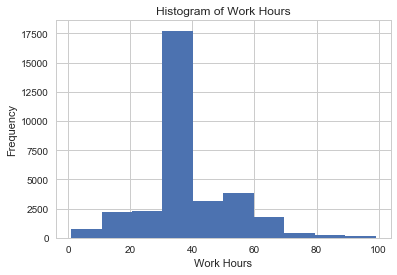

In [56]:
df['hours_per_week'].hist()
plt.title('Histogram of Work Hours')
plt.xlabel('Work Hours')
plt.ylabel('Frequency')
plt.savefig('hist_hours')

In [57]:
#hours per week is overwhelmingly 40
#decide if hours is a good indicator

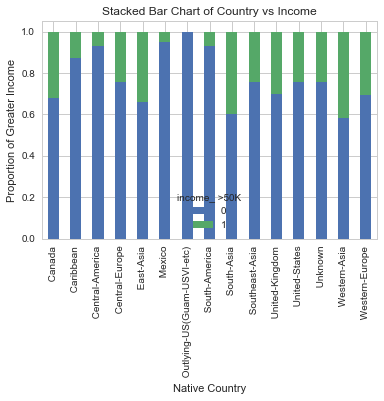

In [58]:
table=pd.crosstab(df['native_country'], df['income_ >50K'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Country vs Income')
plt.xlabel('Native Country')
plt.ylabel('Proportion of Greater Income')
plt.savefig('country_vs_greater_income')

In [59]:
#country seems to be a good indicator
#large range of results
#No percentage for outlying US territories

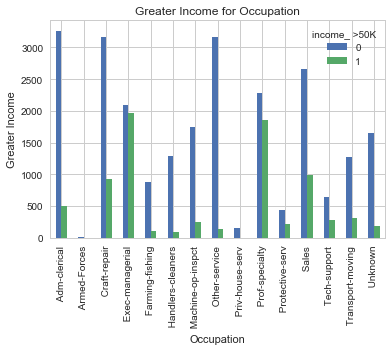

In [60]:
pd.crosstab(df['occupation'], df['income_ >50K']).plot(kind='bar')
plt.title('Greater Income for Occupation')
plt.xlabel('Occupation')
plt.ylabel('Greater Income')
plt.savefig('occupation_vs_greater_income_bar')

In [61]:
#occupation seems to be a good indicator
#large range of results
#blue-collar work shows less chance than
#white-collar, specialized, executive work

In [62]:
#upgrade pip if needed

!python -m pip install --upgrade pip

Requirement already up-to-date: pip in c:\users\hanth\anaconda3\lib\site-packages (18.1)


In [63]:
#install toolbox for imbalanced datasets
#as stated, imbalance between income > 50K and income < 50K

!pip install imblearn 

In [64]:
#Assign variables and import SMOTE:
#Synthetic Minority Over-sampling Technique
#use dummy version of the data because it is completely numeric
#otherwise there will be processing ValueErrors

X = df_dummy.loc[:, df_dummy.columns != 'income_ >50K']
y = df_dummy.loc[:, df_dummy.columns == 'income_ >50K']

from imblearn.over_sampling import SMOTE

In [65]:
#Implement SMOTE to oversample income_ >50K
#the goal is to sample the minority class
#income_ >50K with value 0 (equivalent to income < 50K)
#until the classes are equal
#used for imbalanced binary output variable
#https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

#initialize SMOTE
#split and train the data
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns

#Fit the sample
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['income_ >50K'])

#Check the numbers of the data
#data is now balanced
print("length of oversampled data is ",len(os_data_X))
print("Number of incomes less than 50K in oversampled data",len(os_data_y[os_data_y['income_ >50K']==0]))
print("Number of incomes greater than 50K",len(os_data_y[os_data_y['income_ >50K']==1]))
print("Proportion of incomes less than 50K data in oversampled data is ",len(os_data_y[os_data_y['income_ >50K']==0])/len(os_data_X))
print("Proportion of incomes greater than 50K data in oversampled data is ",len(os_data_y[os_data_y['income_ >50K']==1])/len(os_data_X))

C:\Users\hanth\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


length of oversampled data is  34626
Number of incomes less than 50K in oversampled data 17313
Number of incomes greater than 50K 17313
Proportion of incomes less than 50K data in oversampled data is  0.5
Proportion of incomes greater than 50K data in oversampled data is  0.5


In [66]:
#Utilize Logistic Regression (Logit)
#Binary output variable disqualifies linear regression
#Specifically, it violates several assumptions of the model
#http://thestatsgeek.com/2015/01/17/why-shouldnt-i-use-linear-regression-if-my-outcome-is-binary/

#Implement Recursive Feature Selection (RFE)
#reconstruct logistic regression model with different features recursively
#using increasingly smaller sets of features
#until best performers are chosen
#https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8


#Display array of best and worst features (attributes)
#Display ranking
#All top ranking features (Value 1) were represented as True in the first array

df_dummy_vars=df_dummy.columns.values.tolist()
y=['income_ >50K']
X=[i for i in df_dummy_vars if i not in y]

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

rfe = RFE(logreg, 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

C:\Users\hanth\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hanth\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hanth\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hanth\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hanth\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

[False  True False False False False False False False  True  True  True
  True False  True  True  True  True False False False  True  True False
  True False  True False  True False False  True False False False False
  True False  True False False False False False False False False False
 False False  True False False False  True False False  True False]
[22  1 40 39 31  6 12  5 36  1  1  1  1 14  1  1  1  1 38  3 11  1  1  2
  1 28  1 13  1 10  4  1 15 21 16 17  1  7  1 34 19 29 27 25 20 37 23 26
 33 32  1 18 35 30  1 24  8  1  9]


In [67]:
#Loop through selected feature array
#Match True (best) features to array of column names
#Display selected feature names
#compare list of selected features to early predictions and observed trends

#income <=50K is negatively correlated with our target variable
#Need to be removed to avoid a singular matrix error in the Logistic Regression

selected = []
df_cols = df_dummy.columns.values
index = 0

for result in rfe.support_:
    if result == True:
        selected.append(df_cols[index])
    index += 1

selected.remove('income_ <=50K')
print(selected)

['education_num', 'workclass_ Unknown', 'education_ Advanced', 'education_ College', 'education_ Gradeschool', 'marital_status_ Married', 'marital_status_ Never-married', 'marital_status_ Previously_Married', 'occupation_ Adm-clerical', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Other-service', 'occupation_ Prof-specialty', 'occupation_ Sales', 'occupation_ Unknown', 'race_ White', 'sex_ Male', 'native_country_ United-States', 'Age_buckets_Age_20_40']


In [68]:
#Reassign X using selected best features

X=os_data_X[selected]
y=os_data_y['income_ >50K']

In [69]:
#Import statsmodel api and implement
#https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8
#Fit the model
#Display Results

import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

C:\Users\hanth\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1724: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
C:\Users\hanth\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: inf
         Iterations: 35


C:\Users\hanth\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


                                       Results: Logit
Model:                          Logit                      Pseudo R-squared:           inf   
Dependent Variable:             income_ >50K               AIC:                        inf   
Date:                           2018-12-10 14:00           BIC:                        inf   
No. Observations:               34626                      Log-Likelihood:             -inf  
Df Model:                       18                         LL-Null:                    0.0000
Df Residuals:                   34607                      LLR p-value:                1.0000
Converged:                      0.0000                     Scale:                      1.0000
No. Iterations:                 35.0000                                                      
---------------------------------------------------------------------------------------------
                                    Coef.    Std.Err.     z     P>|z|     [0.025     0.975]  
------

C:\Users\hanth\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [70]:
#Import metrics
#fit the model
#display

from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\hanth\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [71]:
#Predict test set results
#Calculate Accuracy

y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.83


In [72]:
#Implement confusion matrix
#https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[4001 1141]
 [ 643 4603]]


In [73]:
#This result tells is that we have 
#4001 + 4603 correct predictions and 
# 643 + 1141 incorrect predictions

In [74]:
#Display classification report from confusion matrix
#https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.78      0.82      5142
           1       0.80      0.88      0.84      5246

   micro avg       0.83      0.83      0.83     10388
   macro avg       0.83      0.83      0.83     10388
weighted avg       0.83      0.83      0.83     10388



In [75]:
#Precision is the ratio tp / (tp + fp)
#the ability of the classifier 
#to not label a sample as positive if it is negative

#Recall is the ratio tp / (tp + fn)
#the ability of the classifier
#to find all the positive samples.

#The F-beta score can be interpreted as a weighted harmonic mean 
#of the precision and recall, where an F-beta score 
#reaches its best value at 1 and worst score at 0.

#The support is the number of occurrences of each class in y_test.

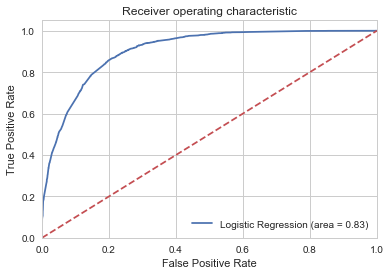

In [76]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [ ]:
#Receiver Operating Characteristic (ROC) curve
#Used with binary classifiers 
#Dotted line represents the ROC curve of a purely random classifier
#a good classifier stays as far away from that line as possible
#(toward the top-left corner)
#https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8